###Split the training set into an 80% training and 20% validation set and conduct / improve upon previous EDA. Build at least three models: an SVM, a logistic regression model, a Naïve Bayes model. Evaluate each of the models’ assumptions. Conduct hyperparameter tuning for the SVM kernel. Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets. Build ROC and Precision / Recall graphs. Evaluate your models' performance on the validation set using the F1-score.  Python scikit-learn should be your primary environment for conducting this research.

In [2]:
# import library 
import pandas as pd
print("Pandas library imported successfully.")

Pandas library imported successfully.


In [3]:
# read the file 
df=pd.read_csv('/Users/maneshss/Desktop/Study/Project/Mangithub/Mangithub/MachineLearning/ProfJaya/data.csv/data.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
print(df.describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          

After seeing this what i infer is that missing values are less and 1 means bankrupty and 0 no bankrupty

In [7]:
#Let us how is the traget variable is distrubuted in the data 
bank_target_distrubution=df['Bankrupt?'].value_counts()
bank_target_percentage = df['Bankrupt?'].value_counts(normalize=True) * 100
print(bank_target_distrubution)
print(bank_target_percentage)

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64


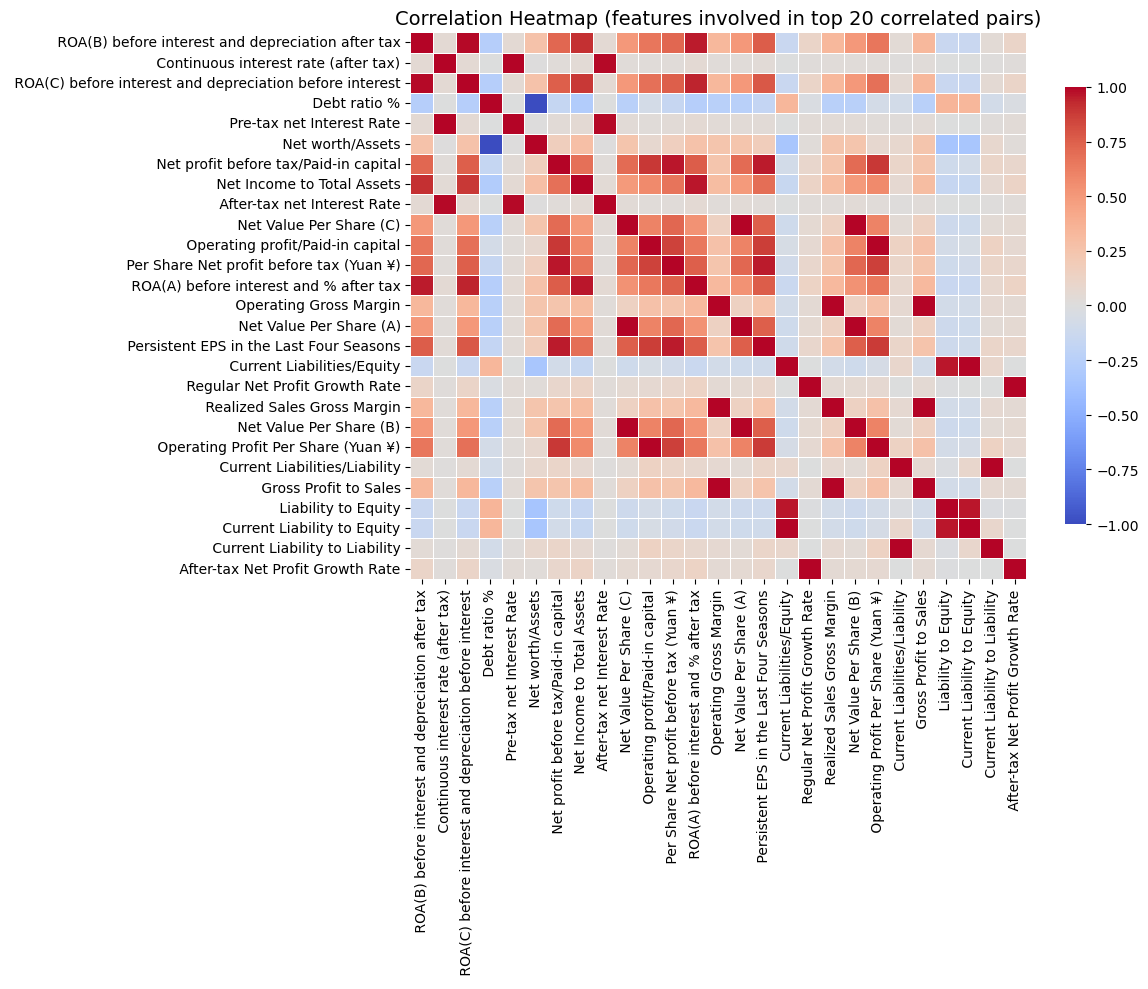

In [8]:
# looking for top 20 variable which are tighly coorelated 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

pairs = upper.stack().abs().sort_values(ascending=False).head(20)
features = list(set([i for i, j in pairs.index] + [j for i, j in pairs.index]))

plt.figure(figsize=(12, 10))
sns.heatmap(corr.loc[features, features], annot=False, cmap="coolwarm", linewidths=.5, cbar_kws={'shrink': .8})
plt.title("Correlation Heatmap (features involved in top 20 correlated pairs)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [9]:
correlation_with_target = corr['Bankrupt?'].sort_values(ascending=False, key=abs)

print("Top 20 features most correlated with 'Bankrupt?' (absolute correlation):")
print(correlation_with_target.head(20))

Top 20 features most correlated with 'Bankrupt?' (absolute correlation):
Bankrupt?                                                   1.000000
 Net Income to Total Assets                                -0.315457
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(C) before interest and depreciation before interest   -0.260807
 Net worth/Assets                                          -0.250161
 Debt ratio %                                               0.250161
 Persistent EPS in the Last Four Seasons                   -0.219560
 Retained Earnings to Total Assets                         -0.217779
 Net profit before tax/Paid-in capital                     -0.207857
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Current Liability to Assets                                0.194494
 Working Capital to Total Assets                           -0.193083
 Net Income to Stockholder's E

EDA
The top correlations with the bankruptcy label show a clear financial story: profitability and returns (Net Income/Assets and ROA measures) have the strongest negative correlations, meaning firms with better earnings power are less likely to be bankrupt. In contrast, leverage and short-term obligations (current liabilities relative to assets, liability-to-equity, borrowing dependency) show positive correlations, indicating higher reliance on debt—especially near-term liabilities—is associated with greater bankruptcy risk. The presence of highly related ratios (e.g., Net worth/Assets vs Debt ratio %) suggests some features may be redundant, so later modeling should check multicollinearity and prefer a subset or regularized methods.

In [11]:
# Data Preprocessing and splitt
#Splitting the preprocessed data 80% training set and 20 %  validation set for analsysis 
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

print("Features (X) and target (y) separated successfully.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Features (X) and target (y) separated successfully.
Shape of X: (6819, 95)
Shape of y: (6819,)


In [12]:
# removing value with zero variance 
zero_var_cols = X.columns[X.nunique() == 1]
X = X.drop(columns=zero_var_cols)

print(f"Dropped {len(zero_var_cols)} columns with zero variance:")
for col in zero_var_cols:
    print(f"- {col}")

print(f"\nNew shape of X after dropping zero-variance columns: {X.shape}")

Dropped 1 columns with zero variance:
-  Net Income Flag

New shape of X after dropping zero-variance columns: (6819, 94)


In [13]:
#Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled successfully.")
print(f"Shape of scaled X: {X.shape}")

# Split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

print("\nData split into training and validation sets successfully.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True) * 100)
print("\nClass distribution in y_val:")
print(y_val.value_counts(normalize=True) * 100)

Features scaled successfully.
Shape of scaled X: (6819, 94)

Data split into training and validation sets successfully.
Shape of X_train: (5455, 94)
Shape of X_val: (1364, 94)
Shape of y_train: (5455,)
Shape of y_val: (1364,)

Class distribution in y_train:
Bankrupt?
0    96.773602
1     3.226398
Name: proportion, dtype: float64

Class distribution in y_val:
Bankrupt?
0    96.774194
1     3.225806
Name: proportion, dtype: float64


In [14]:
#Logistic regression model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, classification_report

#print("Required libraries imported successfully.")

Logistic regression is a good baseline model for this bankruptcy problem because the target is binary and the dataset is large. However, the data contains many financial ratios that can be highly correlated (multicollinearity) and may have non-linear relationships with bankruptcy risk. In addition, the target is imbalanced (bankrupt firms are rare), so evaluation should rely on recall, precision, F1-score, and PR curves rather than accuracy alone. Using feature screening, regularization, and class-weighting makes logistic regression more appropriate and improves its ability to detect bankrupt firms.

**Reasoning**:
Will start with Logistic Regression model with `class_weight='balanced'` to handle the class imbalance, `solver='liblinear'` suitable for smaller datasets, and `random_state=42` for reproducibility, as instructed. Then, I will train this model using the `X_train` and `y_train` datasets.

In [16]:
logistic_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=45)
logistic_model.fit(X_train, y_train)

print("Logistic Regression model instantiated and trained successfully.")

Logistic Regression model instantiated and trained successfully.


In [17]:
#Now i will preditct the positive class and class labels for both validation and training set
y_train_pred_proba = logistic_model.predict_proba(X_train)[:, 1]
y_val_pred_proba = logistic_model.predict_proba(X_val)[:, 1]

y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)

print("Predictions (probabilities and class labels) made for training and validation sets.")

Predictions (probabilities and class labels) made for training and validation sets.


#Reasoning#:
This step is to calculate and print the performance metrics (accuracy, precision, recall, F1-score) for both the training and validation sets using `classification_report` for a comprehensive view and individual scores for the positive class (1).

In [19]:
print("\n--- Training Set Evaluation ---")
print("Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

print("Accuracy Score (Training Set):", accuracy_score(y_train, y_train_pred))
print("Precision Score (Training Set, Class 1):", precision_score(y_train, y_train_pred, pos_label=1))
print("Recall Score (TPR) (Training Set, Class 1):", recall_score(y_train, y_train_pred, pos_label=1))
print("F1 Score (Training Set, Class 1):", f1_score(y_train, y_train_pred, pos_label=1))

print("\n--- Validation Set Evaluation ---")
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

print("Accuracy Score (Validation Set):", accuracy_score(y_val, y_val_pred))
print("Precision Score (Validation Set, Class 1):", precision_score(y_val, y_val_pred, pos_label=1))
print("Recall Score (TPR) (Validation Set, Class 1):", recall_score(y_val, y_val_pred, pos_label=1))
print("F1 Score (Validation Set, Class 1):", f1_score(y_val, y_val_pred, pos_label=1))


--- Training Set Evaluation ---
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      5279
           1       0.20      0.90      0.32       176

    accuracy                           0.88      5455
   macro avg       0.60      0.89      0.63      5455
weighted avg       0.97      0.88      0.91      5455

Accuracy Score (Training Set): 0.8782768102658112
Precision Score (Training Set, Class 1): 0.19651741293532338
Recall Score (TPR) (Training Set, Class 1): 0.8977272727272727
F1 Score (Training Set, Class 1): 0.3224489795918367

--- Validation Set Evaluation ---
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.17      0.82      0.28        44

    accuracy                           0.87      1364
   macro avg       0.58      0.84      0.60      1364
weighted avg       0.97     

ROC curve to understand false positive ,true positive rate and area under the curve this i will do for training set and validation set 

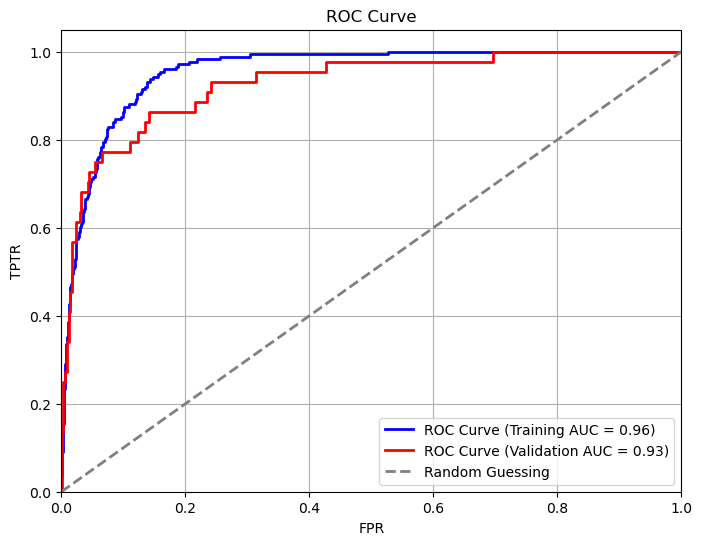

ROC curves for training and validation sets displayed.


In [21]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC Curve (Training AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='red', lw=2, label=f'ROC Curve (Validation AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPTR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC curves for training and validation sets displayed.")

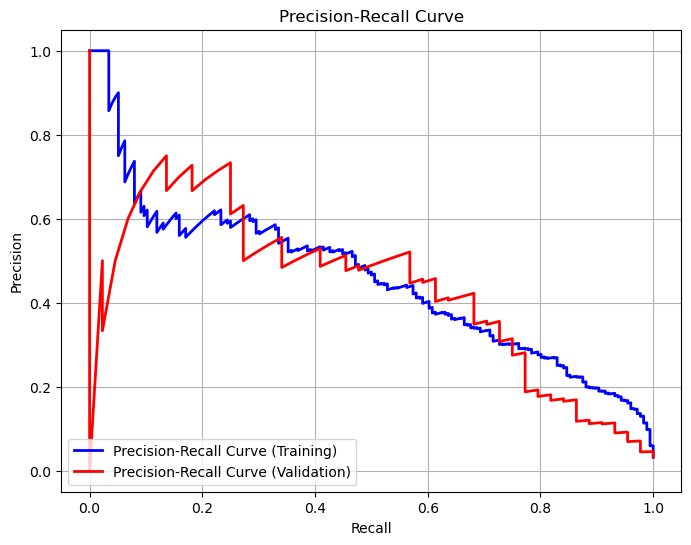

Precision-Recall curves for training and validation sets displayed.


In [22]:
#precission vs recall
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba)
precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, color='blue', lw=2, label='Precision-Recall Curve (Training)')
plt.plot(recall_val, precision_val, color='red', lw=2, label='Precision-Recall Curve (Validation)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("Precision-Recall curves for training and validation sets displayed.")

In [23]:
# let me calculate the F1 score on the training an dvalidation set
f1_val = f1_score(y_val, y_val_pred, pos_label=1)
print(f"Final F1-score on the validation set: {f1_val:.4f}")

Final F1-score on the validation set: 0.2835


##Naïve Bayes assumes that predictor variables are conditionally independent given the class label and (for Gaussian Naïve Bayes) that each feature is normally distributed within each class. In this bankruptcy dataset, many financial ratios are strongly related (e.g., multiple ROA measures and multiple leverage ratios), so the independence assumption is likely violated, and ratio distributions are often skewed or bounded rather than perfectly normal. Despite these mismatches, Naïve Bayes is still useful as a fast baseline classifier; its performance should be judged using precision, recall, and F1-score due to class imbalance, and PR/ROC curves help evaluate whether it can detect bankrupt firms without producing too many false positives.

In [25]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [26]:
y_train_pred_proba_nb = naive_bayes_model.predict_proba(X_train)[:, 1]
y_val_pred_proba_nb = naive_bayes_model.predict_proba(X_val)[:, 1]

y_train_pred_nb = naive_bayes_model.predict(X_train)
y_val_pred_nb = naive_bayes_model.predict(X_val)

print("Predictions (probabilities and class labels) made for training and validation sets using Naïve Bayes.")

Predictions (probabilities and class labels) made for training and validation sets using Naïve Bayes.


Calculate and print the performance metrics (accuracy, precision, recall, and F1-score) for both the training and validation sets for the Naïve Bayes model, including a classification report for a comprehensive view and individual scores for the positive class (1).

In [28]:
print("\n--- Naïve Bayes Training Set Evaluation ---")
print("Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred_nb))

print("Accuracy Score (Training Set):", accuracy_score(y_train, y_train_pred_nb))
print("Precision Score (Training Set, Class 1):", precision_score(y_train, y_train_pred_nb, pos_label=1))
print("Recall Score (TPR) (Training Set, Class 1):", recall_score(y_train, y_train_pred_nb, pos_label=1))
print("F1 Score (Training Set, Class 1):", f1_score(y_train, y_train_pred_nb, pos_label=1))

print("\n--- Naïve Bayes Validation Set Evaluation ---")
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred_nb))

print("Accuracy Score (Validation Set):", accuracy_score(y_val, y_val_pred_nb))
print("Precision Score (Validation Set, Class 1):", precision_score(y_val, y_val_pred_nb, pos_label=1))
print("Recall Score (TPR) (Validation Set, Class 1):", recall_score(y_val, y_val_pred_nb, pos_label=1))
print("F1 Score (Validation Set, Class 1):", f1_score(y_val, y_val_pred_nb, pos_label=1))


--- Naïve Bayes Training Set Evaluation ---
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      0.26      0.41      5279
           1       0.04      0.99      0.08       176

    accuracy                           0.29      5455
   macro avg       0.52      0.63      0.25      5455
weighted avg       0.97      0.29      0.40      5455

Accuracy Score (Training Set): 0.2852428964252979
Precision Score (Training Set, Class 1): 0.04274134119380987
Recall Score (TPR) (Training Set, Class 1): 0.9886363636363636
F1 Score (Training Set, Class 1): 0.08194019307746644

--- Naïve Bayes Validation Set Evaluation ---
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.98      0.25      0.39      1320
           1       0.04      0.89      0.07        44

    accuracy                           0.27      1364
   macro avg       0.51      0.57      0.23      1364
wei

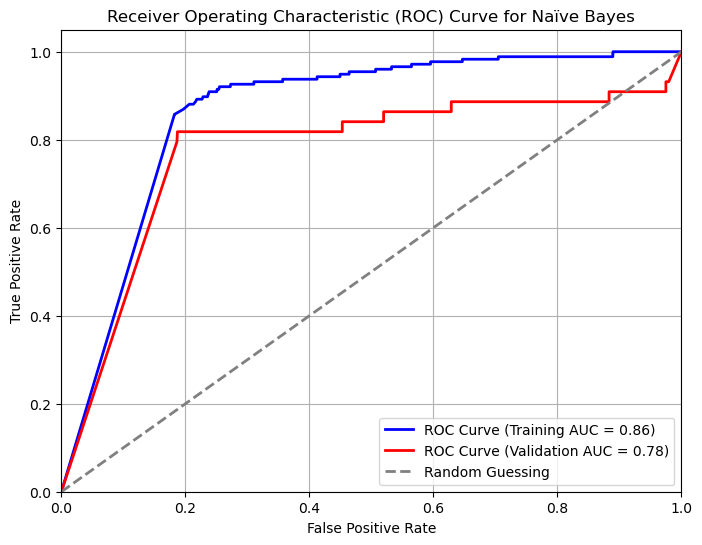

ROC curves for Naïve Bayes training and validation sets displayed.


In [29]:
#ROC graph 
fpr_train_nb, tpr_train_nb, _ = roc_curve(y_train, y_train_pred_proba_nb)
roc_auc_train_nb = auc(fpr_train_nb, tpr_train_nb)

fpr_val_nb, tpr_val_nb, _ = roc_curve(y_val, y_val_pred_proba_nb)
roc_auc_val_nb = auc(fpr_val_nb, tpr_val_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_nb, tpr_train_nb, color='blue', lw=2, label=f'ROC Curve (Training AUC = {roc_auc_train_nb:.2f})')
plt.plot(fpr_val_nb, tpr_val_nb, color='red', lw=2, label=f'ROC Curve (Validation AUC = {roc_auc_val_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naïve Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC curves for Naïve Bayes training and validation sets displayed.")

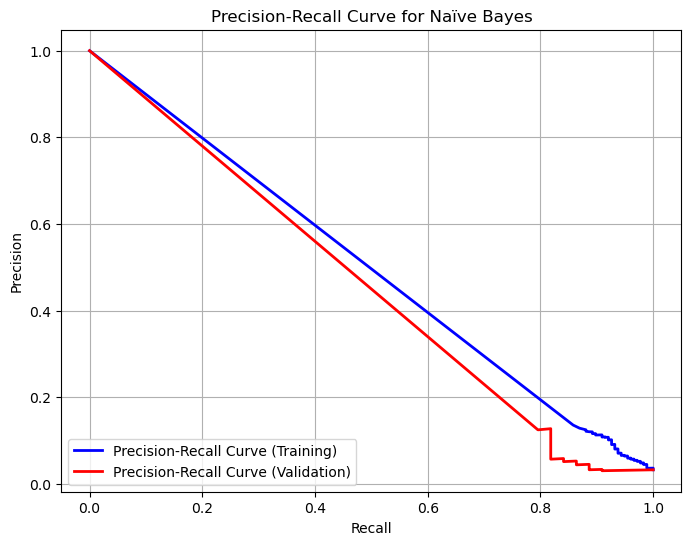

Precision-Recall curves for Naïve Bayes training and validation sets displayed.


In [30]:
# Precision - Recall on this data 
precision_train_nb, recall_train_nb, _ = precision_recall_curve(y_train, y_train_pred_proba_nb)
precision_val_nb, recall_val_nb, _ = precision_recall_curve(y_val, y_val_pred_proba_nb)

plt.figure(figsize=(8, 6))
plt.plot(recall_train_nb, precision_train_nb, color='blue', lw=2, label='Precision-Recall Curve (Training)')
plt.plot(recall_val_nb, precision_val_nb, color='red', lw=2, label='Precision-Recall Curve (Validation)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naïve Bayes')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("Precision-Recall curves for Naïve Bayes training and validation sets displayed.")

In [31]:
f1_validation_nb = f1_score(y_val, y_val_pred_nb, pos_label=1)
print(f"Final F1-score for Naïve Bayes on the validation set: {f1_validation_nb:.4f}")

Final F1-score for Naïve Bayes on the validation set: 0.0724


## SVM Model with Hyperparameter Tuning and Evaluation
SVM assumes that the two classes can be separated by a maximum-margin boundary, either directly (linear kernel) or after a kernel transformation (RBF/poly). Unlike logistic regression and Naïve Bayes, SVM does not require normality, linear relationships, or feature independence, which fits financial ratio data that is often skewed and correlated. However, SVM is highly sensitive to feature scaling and can be influenced by outliers; therefore standardization and careful tuning of hyperparameters such as kernel type, C, and gamma are essential. Because bankruptcy cases are rare in this dataset, using class weighting and evaluating performance with F1-score and precision–recall curves is especially important to ensure the model detects bankrupt firms rather than defaulting to the majority class.

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability=True, class_weight='balanced', random_state=45)

In [34]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

print("Parameter grid for GridSearchCV defined successfully.")

Parameter grid for GridSearchCV defined successfully.


In [35]:
grid_search = GridSearchCV(svc, param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
print("GridSearchCV instantiated with the SVC model and parameter grid.")

GridSearchCV instantiated with the SVC model and parameter grid.


In [36]:
print("Starting GridSearchCV fit...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fit complete.")

Starting GridSearchCV fit...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV fit complete.


## SVM Model with Reduced Hyperparameter Tuning

In [38]:
grid_search = GridSearchCV(svc, param_grid, scoring='f1', cv=2, verbose=2, n_jobs=-1)
print("GridSearchCV instantiated with the SVC model and parameter grid, using cv=3.")

print("Starting GridSearchCV fit...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fit complete.")

GridSearchCV instantiated with the SVC model and parameter grid, using cv=3.
Starting GridSearchCV fit...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
GridSearchCV fit complete.


In [39]:
print(f"Best parameters for SVM: {grid_search.best_params_}")
print(f"Best F1-score for SVM: {grid_search.best_score_:.4f}")

Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best F1-score for SVM: 0.2662


In [40]:
print("Re-fitting GridSearchCV as previous fit was interrupted...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fit complete.")

print(f"Best parameters for SVM: {grid_search.best_params_}")
print(f"Best F1-score for SVM: {grid_search.best_score_:.4f}")

Re-fitting GridSearchCV as previous fit was interrupted...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
GridSearchCV fit complete.
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best F1-score for SVM: 0.2662


In [41]:
best_svm_model = grid_search.best_estimator_

y_train_pred_proba_svm = best_svm_model.predict_proba(X_train)[:, 1]
y_val_pred_proba_svm = best_svm_model.predict_proba(X_val)[:, 1]

y_train_pred_svm = best_svm_model.predict(X_train)
y_val_pred_svm = best_svm_model.predict(X_val)

print("Predictions (probabilities and class labels) made for training and validation sets using the best SVM model.")

Predictions (probabilities and class labels) made for training and validation sets using the best SVM model.


In [42]:
print("\n--- SVM Training Set Evaluation ---")
print("Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred_svm))

print("Accuracy Score (Training Set):", accuracy_score(y_train, y_train_pred_svm))
print("Precision Score (Training Set, Class 1):", precision_score(y_train, y_train_pred_svm, pos_label=1))
print("Recall Score (TPR) (Training Set, Class 1):", recall_score(y_train, y_train_pred_svm, pos_label=1))
print("F1 Score (Training Set, Class 1):", f1_score(y_train, y_train_pred_svm, pos_label=1))

print("\n--- SVM Validation Set Evaluation ---")
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred_svm))

print("Accuracy Score (Validation Set):", accuracy_score(y_val, y_val_pred_svm))
print("Precision Score (Validation Set, Class 1):", precision_score(y_val, y_val_pred_svm, pos_label=1))
print("Recall Score (TPR) (Validation Set, Class 1):", recall_score(y_val, y_val_pred_svm, pos_label=1))
print("F1 Score (Validation Set, Class 1):", f1_score(y_val, y_val_pred_svm, pos_label=1))


--- SVM Training Set Evaluation ---
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      5279
           1       0.20      0.92      0.33       176

    accuracy                           0.88      5455
   macro avg       0.60      0.90      0.63      5455
weighted avg       0.97      0.88      0.91      5455

Accuracy Score (Training Set): 0.8777268560953254
Precision Score (Training Set, Class 1): 0.19877300613496932
Recall Score (TPR) (Training Set, Class 1): 0.9204545454545454
F1 Score (Training Set, Class 1): 0.32694248234106965

--- SVM Validation Set Evaluation ---
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1320
           1       0.17      0.84      0.28        44

    accuracy                           0.86      1364
   macro avg       0.58      0.85      0.60      1364
weighted avg       

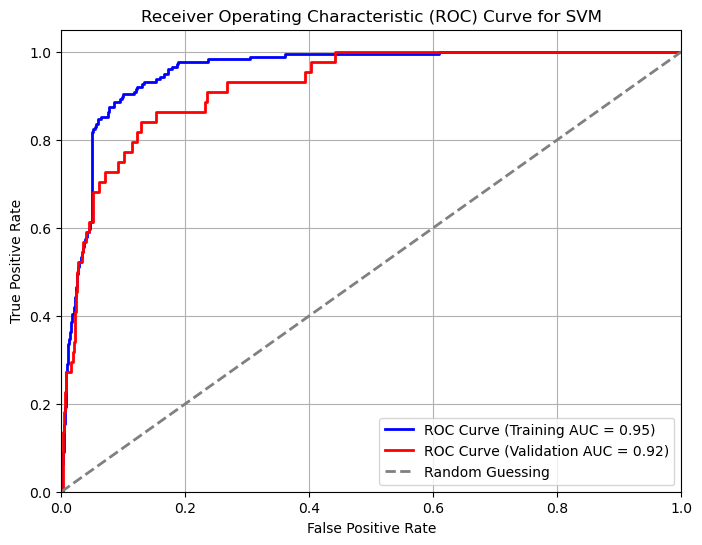

ROC curves for SVM training and validation sets displayed.


In [43]:
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_train_pred_proba_svm)
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

fpr_val_svm, tpr_val_svm, _ = roc_curve(y_val, y_val_pred_proba_svm)
roc_auc_val_svm = auc(fpr_val_svm, tpr_val_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_svm, tpr_train_svm, color='blue', lw=2, label=f'ROC Curve (Training AUC = {roc_auc_train_svm:.2f})')
plt.plot(fpr_val_svm, tpr_val_svm, color='red', lw=2, label=f'ROC Curve (Validation AUC = {roc_auc_val_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC curves for SVM training and validation sets displayed.")

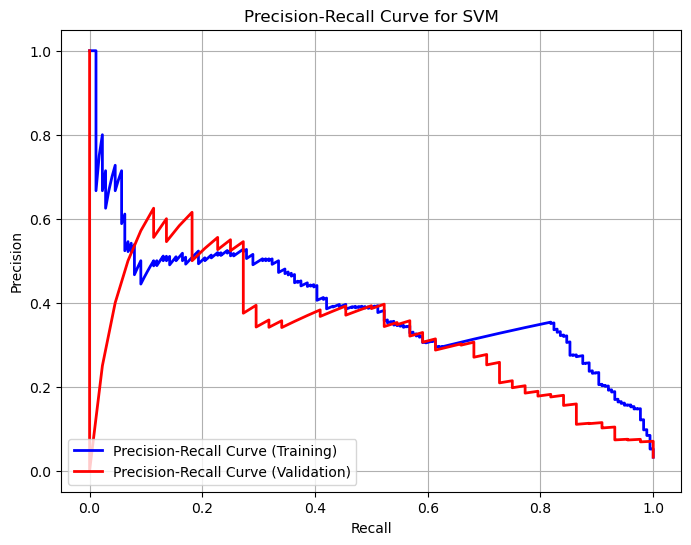

Precision-Recall curves for SVM training and validation sets displayed.


In [44]:
precision_train_svm, recall_train_svm, _ = precision_recall_curve(y_train, y_train_pred_proba_svm)
precision_val_svm, recall_val_svm, _ = precision_recall_curve(y_val, y_val_pred_proba_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall_train_svm, precision_train_svm, color='blue', lw=2, label='Precision-Recall Curve (Training)')
plt.plot(recall_val_svm, precision_val_svm, color='red', lw=2, label='Precision-Recall Curve (Validation)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("Precision-Recall curves for SVM training and validation sets displayed.")

In [45]:
f1_validation_svm = f1_score(y_val, y_val_pred_svm, pos_label=1)
print(f"Final F1-score for SVM on the validation set: {f1_validation_svm:.4f}")

Final F1-score for SVM on the validation set: 0.2814


In [46]:
import pandas as pd

# Consolidate metrics for easier comparison
metrics_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naïve Bayes', 'SVM'],
    'Validation F1-score': [f1_val, f1_validation_nb, f1_validation_svm],
    'Validation Recall (TPR)': [recall_score(y_val, y_val_pred, pos_label=1), recall_score(y_val, y_val_pred_nb, pos_label=1), recall_score(y_val, y_val_pred_svm, pos_label=1)],
    'Validation Precision': [precision_score(y_val, y_val_pred, pos_label=1), precision_score(y_val, y_val_pred_nb, pos_label=1), precision_score(y_val, y_val_pred_svm, pos_label=1)],
    'Validation Accuracy': [accuracy_score(y_val, y_val_pred), accuracy_score(y_val, y_val_pred_nb), accuracy_score(y_val, y_val_pred_svm)],
    'Validation ROC AUC': [roc_auc_val, roc_auc_val_nb, roc_auc_val_svm]
})

print("--- Model Performance Summary on Validation Set ---")
print(metrics_summary.round(4))





--- Model Performance Summary on Validation Set ---
                 Model  Validation F1-score  Validation Recall (TPR)  \
0  Logistic Regression               0.2835                   0.8182   
1          Naïve Bayes               0.0724                   0.8864   
2                  SVM               0.2814                   0.8409   

   Validation Precision  Validation Accuracy  Validation ROC AUC  
0                0.1714               0.8666              0.9274  
1                0.0377               0.2669              0.7755  
2                0.1689               0.8614              0.9225  


Logistic Regression delivered the best overall validation performance for bankruptcy prediction, achieving the highest F1-score (0.2835) while maintaining strong recall/TPR (0.8182) and the highest ROC AUC (0.9274). This indicates it identifies most bankrupt firms, though precision remains modest (0.1714), meaning some non-bankrupt companies are incorrectly flagged—an expected trade-off in a highly imbalanced dataset. SVM performed very similarly, with an almost equal F1-score (0.2814) and even higher recall (0.8409), while maintaining a strong ROC AUC (0.9225) and solid accuracy (0.8614), suggesting it is competitive for detecting bankrupt firms but still produces false positives due to modest precision (0.1689). Naïve Bayes achieved the highest recall (0.8864) but performed poorly overall because precision was extremely low (0.0377) and accuracy was low (0.2669), indicating it flags far too many firms as bankrupt—likely because its independence/normality assumptions do not fit correlated financial ratio data well. Overall, Logistic Regression remains the most practical choice because it has the best overall balance (top F1 and ROC AUC) while staying interpretable for business decision-making, with SVM as a close second depending on whether slightly higher recall is preferred.



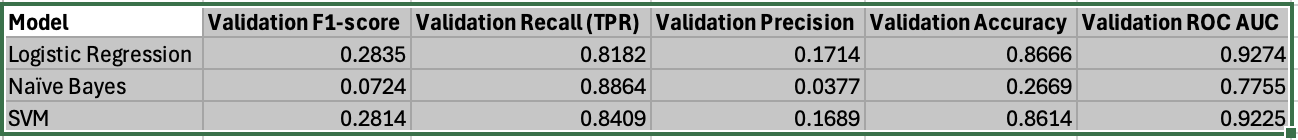